# 1. Import Data

In [794]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [795]:
df = pd.read_excel('Cabify_Data_set_-_Rider_Growth_Analyst_(PE).xlsx')
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:52,-12.139835,-77.023560,2010-11-16 17:29:57,...,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:38,-12.138748,-76.995361,2010-06-01 00:37:39,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:24,-12.124531,-77.027802,2010-05-31 05:04:34,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:30,-12.138851,-76.995300,2010-06-01 00:32:35,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,-12.089954,-76.926270,2010-09-12 01:07:02,...,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


# 2. Cleaning

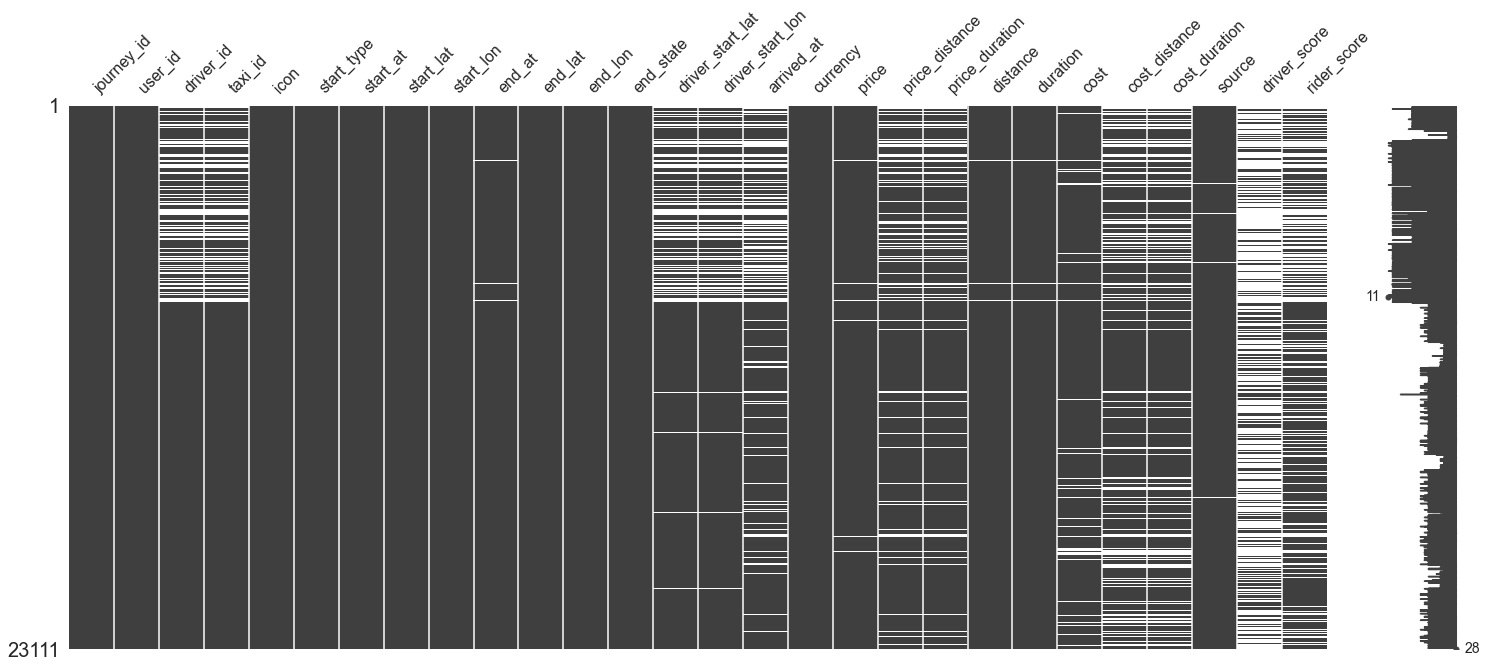

driver_score        15461
rider_score          7721
arrived_at           5395
cost_duration        5073
cost_distance        5073
driver_start_lat     3490
driver_start_lon     3490
driver_id            3385
taxi_id              3385
price_duration       3170
price_distance       3170
cost                 1351
price                 398
end_at                276
duration              263
distance              263
source                123
end_state              12
icon                    0
start_lat               0
start_lon               0
currency                0
start_type              0
user_id                 0
start_at                0
end_lon                 0
end_lat                 0
journey_id              0
dtype: int64

In [796]:
# Missingno: Useful package for visualizing and understanding missing data
# In terminal: pip3 install missingno
import missingno as msno

# Plot missingness
msno.matrix(df)
plt.show()

# Total empty values by column
df.isna().sum().sort_values(ascending=False)

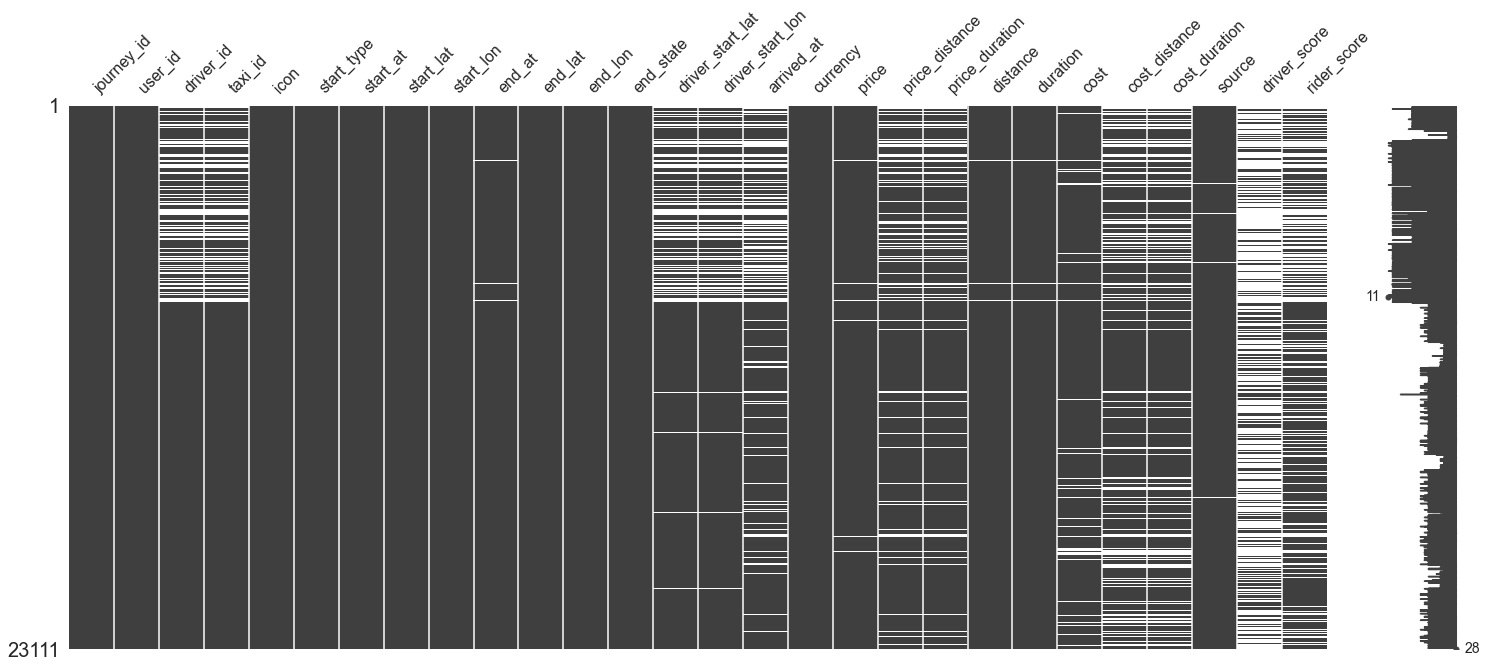

driver_score        15461
rider_score          7721
arrived_at           5395
cost_duration        5073
cost_distance        5073
driver_start_lat     3490
driver_start_lon     3490
driver_id            3385
taxi_id              3385
price_duration       3170
price_distance       3170
cost                 1351
price                 398
end_at                276
duration              263
distance              263
source                123
end_state              12
icon                    0
start_lat               0
start_lon               0
currency                0
start_type              0
user_id                 0
start_at                0
end_lon                 0
end_lat                 0
journey_id              0
dtype: int64

In [797]:
# Missingno: Useful package for visualizing and understanding missing data
# In terminal: pip3 install missingno
import missingno as msno

# Plot missingness
msno.matrix(df)
plt.show()

# Total empty values by column
df.isna().sum().sort_values(ascending=False)

# Sort dataset by start_at and offsets UTC-0 to UTC-5

In [798]:
# Sort by start_at
df = df.sort_values(by='start_at', ascending=False)
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 22:57:55,-12.022614,-77.108337,2010-12-31 22:58:10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 22:30:20,-12.027391,-77.106556,2010-12-31 22:31:59,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Android,NaN,NaN
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 22:22:11,-12.085149,-76.977739,2010-12-31 22:49:24,...,2828.0,43.0,8836.0,51.0,0.0,0.0,0.0,Android,NaN,5.0
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 21:36:49,-12.100601,-77.008026,2010-12-31 21:58:34,...,2356.0,51.0,7363.0,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 20:54:44,-12.126499,-77.003082,2010-12-31 21:23:32,...,2246.0,0.0,7019.0,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0


In [799]:
from datetime import timezone, datetime

# Convert the time to a timezone-aware datetime object
df['start_at'] = df['start_at'].dt.tz_localize(timezone.utc)
df['end_at'] = df['end_at'].dt.tz_localize(timezone.utc)
df['arrived_at'] = df['arrived_at'].dt.tz_localize(timezone.utc)
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 22:57:55+00:00,-12.022614,-77.108337,2010-12-31 22:58:10+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 22:30:20+00:00,-12.027391,-77.106556,2010-12-31 22:31:59+00:00,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Android,NaN,NaN
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 22:22:11+00:00,-12.085149,-76.977739,2010-12-31 22:49:24+00:00,...,2828.0,43.0,8836.0,51.0,0.0,0.0,0.0,Android,NaN,5.0
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 21:36:49+00:00,-12.100601,-77.008026,2010-12-31 21:58:34+00:00,...,2356.0,51.0,7363.0,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 20:54:44+00:00,-12.126499,-77.003082,2010-12-31 21:23:32+00:00,...,2246.0,0.0,7019.0,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0


In [800]:
# Convert the time from to another timezone
# The point in time does not change, only the associated timezone

import pytz
my_timezone = pytz.timezone('America/Lima')
df['start_at'] = df['start_at'].dt.tz_convert(my_timezone)
df['end_at'] = df['end_at'].dt.tz_convert(my_timezone)
df['arrived_at'] = df['arrived_at'].dt.tz_convert(my_timezone)
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 17:57:55-05:00,-12.022614,-77.108337,2010-12-31 17:58:10-05:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 17:30:20-05:00,-12.027391,-77.106556,2010-12-31 17:31:59-05:00,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Android,NaN,NaN
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11-05:00,-12.085149,-76.977739,2010-12-31 17:49:24-05:00,...,2828.0,43.0,8836.0,51.0,0.0,0.0,0.0,Android,NaN,5.0
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49-05:00,-12.100601,-77.008026,2010-12-31 16:58:34-05:00,...,2356.0,51.0,7363.0,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44-05:00,-12.126499,-77.003082,2010-12-31 16:23:32-05:00,...,2246.0,0.0,7019.0,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0


In [801]:
# Remove timezone of datetimes with adjusted UTC
df['start_at'] = df['start_at'].dt.tz_localize(None)
df['end_at'] = df['end_at'].dt.tz_localize(None)
df['arrived_at'] = df['arrived_at'].dt.tz_localize(None)
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 17:57:55,-12.022614,-77.108337,2010-12-31 17:58:10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 17:30:20,-12.027391,-77.106556,2010-12-31 17:31:59,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Android,NaN,NaN
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11,-12.085149,-76.977739,2010-12-31 17:49:24,...,2828.0,43.0,8836.0,51.0,0.0,0.0,0.0,Android,NaN,5.0
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49,-12.100601,-77.008026,2010-12-31 16:58:34,...,2356.0,51.0,7363.0,61.0,1805.0,1767.0,38.0,iPhone,5.0,4.0
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44,-12.126499,-77.003082,2010-12-31 16:23:32,...,2246.0,0.0,7019.0,0.0,1685.0,1685.0,0.0,iPhone,5.0,4.0


# Convert data to category values

In [802]:
# Convert columns to category data type, to do this is necessary to make a copy of df
df = df.copy()

columns_to_category = ['icon', 'start_type', 'end_state', 'currency', 'source']
df[columns_to_category] = df[columns_to_category].apply(lambda x: x.astype('category'))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23111 entries, 3853 to 12212
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  category      
 5   start_type        23111 non-null  category      
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  float64       
 8   start_lon         23111 non-null  float64       
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  float64       
 11  end_lon           23111 non-null  float64       
 12  end_state         23099 non-null  category      
 13  driver_start_lat  19621 non-null  float64       
 14  driver_start_lon  1

# 3. Exploratory Data Analysis

# 3.1. Categorical data

In [803]:
df_user_id = df.user_id.value_counts().sort_values(ascending=False).rename_axis('user_id').reset_index(name='counts')
df_user_id

,user_id,counts
0,a86c8d399be95a32f795a8a9887127b9,834
1,8ed36e0e9dbf62743c06c09e5f7c1835,602
2,ae06c34243f741e203e97c48eb42017b,572
3,8e37a68fab5f31a5e2c1b5f77c6bb9e5,467
4,406921adcca37705ef527b4246c12e83,436
...,...,...
1385,4933dfc3aa43418031d095968b6f566e,1
1386,cf0c3902b7a3c665864f48b73a303d17,1
1387,f0e51f67ba3ee8f65c2a4d7e138e1978,1
1388,65b6f3b7075270499ddd0f1dc11be833,1


In [804]:
df_driver_id = df.driver_id.value_counts().sort_values(ascending=False).rename_axis('driver_id').reset_index(name='counts')
df_driver_id

,driver_id,counts
0,c814db2127582cf95dea1f74f43127c2,1523
1,d665fb9f75ef5d9cd0fd89479380ba78,1225
2,ff5c924e0b630fd7c019a4234059fdf4,1111
3,406921adcca37705ef527b4246c0cfea,1075
4,ec84a73745199ff840ecafcb924383ad,974
...,...,...
163,bf0f0845b5094fda2fcdac195ece97ad,1
164,a8c74399632ec313e9e79e1a30538570,1
165,ef35302138c34b70ddbeb9a52255be1c,1
166,29c460e9d44ae084d4631c5ade4ec8a8,1


In [805]:
df_taxi_id = df.taxi_id.value_counts().sort_values(ascending=False).rename_axis('taxi_id').reset_index(name='counts')
df_taxi_id

,taxi_id,counts
0,16cbe35db7fff70fbc8251b4cdca8eb8,840
1,0accdd3aa5a322f4129fa20b53278c69,696
2,c814db2127582cf95dea1f74f4310a9b,682
3,ec84a73745199ff840ecafcb9283193f,608
4,ff5c924e0b630fd7c019a423405c86f6,590
...,...,...
208,ef35302138c34b70ddbeb9a52255d928,1
209,5c2461c42df547d02021de37b2a2abc4,1
210,d7baa0261635d7dd15539395bd85364e,1
211,376c68f5428776d661622edd4c847692,1


In [806]:
df_icon = df.icon.value_counts().sort_values(ascending=False).rename_axis('icon').reset_index(name='counts')
df_icon

,icon,counts
0,executive,22737
1,group,239
2,easy,135


In [807]:
df_start_type = df.start_type.value_counts().sort_values(ascending=False).rename_axis('start_type').reset_index(name='counts')
df_start_type

,start_type,counts
0,asap,14865
1,reserved,8226
2,delayed,20


In [808]:
df_end_state = df.end_state.value_counts().sort_values(ascending=False).rename_axis('end_state').reset_index(name='counts')
df_end_state

,end_state,counts
0,drop off,17417
1,rider cancel,3976
2,not found,1145
3,driver cancel,292
4,failure,249
5,no show,20


In [809]:
df_currency = df.currency.value_counts().sort_values(ascending=False).rename_axis('currency').reset_index(name='counts')
df_currency

,currency,counts
0,PEN,23111


In [810]:
df_value_counts = df.source.value_counts().sort_values(ascending=False).rename_axis('source').reset_index(name='counts')
df_value_counts

,source,counts
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


In [811]:
# Export dataframe to excel
df.to_excel('dataset.xlsx')

# 3.2. Numerical data

In [812]:
df_numerical = df[['price', 'price_distance', 'price_duration', 'distance', 'cost', 'cost_distance', 'cost_duration', 'driver_score', 'rider_score']]
df_numerical = pd.DataFrame(df_numerical.describe())
df_numerical

,price,price_distance,price_duration,distance,cost,cost_distance,cost_duration,driver_score,rider_score
count,22713.000000,1.994100e+04,19941.000000,2.284800e+04,21760.000000,1.803800e+04,18038.000000,7650.000000,15390.000000
mean,2752.738784,3.404748e+03,606.005617,1.088395e+04,2655.032445,2.099408e+03,401.550504,3.933333,4.755491
std,3025.390309,4.851010e+04,1553.548938,2.025735e+05,17124.801935,3.300314e+04,1148.614398,1.744948,0.840558
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1700.000000,8.270000e+02,30.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,4.000000,5.000000
50%,1911.000000,1.754000e+03,247.000000,4.660000e+03,1450.000000,1.048000e+03,127.000000,5.000000,5.000000
75%,3597.000000,3.256000e+03,628.000000,9.290250e+03,2381.250000,2.230000e+03,414.000000,5.000000,5.000000
max,55974.000000,4.491910e+06,69839.000000,1.403722e+07,525000.000000,3.368792e+06,48887.000000,5.000000,5.000000


# 3.3. Datetime data

In [813]:
from datetime import datetime, timedelta, timezone
from dateutil import tz

In [814]:
# Min and max date of operations
print(df.start_at.min())
print(df.start_at.max())
print(df.end_at.max() - df.start_at.min())

2009-12-31 19:25:22
2010-12-31 17:57:55
364 days 22:32:48


In [815]:
# Add Day of Week of start_at
df['Day of Week - Start at'] = df.start_at.dt.day_name()

# Extract hour of each start_at
def hr_func(ts):
    return ts.hour
df['start_at_hour'] = df.start_at.apply(hr_func)

# Time (in minutes) between Start and Arrived
df['Arrived-Start_duration_min'] = (df.arrived_at  - df.start_at).dt.total_seconds()/60

# Time (in minutes) between Arrived and End
df['End-Arrived_duration_min'] = (df.end_at  - df.start_at).dt.total_seconds()/60

df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,cost,cost_distance,cost_duration,source,driver_score,rider_score,Day of Week - Start at,start_at_hour,Arrived-Start_duration_min,End-Arrived_duration_min
3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 17:57:55,-12.022614,-77.108337,2010-12-31 17:58:10,...,0.0,0.0,0.0,iPhone,NaN,NaN,Friday,17,NaN,0.250000
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 17:30:20,-12.027391,-77.106556,2010-12-31 17:31:59,...,0.0,NaN,NaN,Android,NaN,NaN,Friday,17,NaN,1.650000
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11,-12.085149,-76.977739,2010-12-31 17:49:24,...,0.0,0.0,0.0,Android,NaN,5.0,Friday,17,12.283333,27.216667
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49,-12.100601,-77.008026,2010-12-31 16:58:34,...,1805.0,1767.0,38.0,iPhone,5.0,4.0,Friday,16,4.566667,21.750000
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44,-12.126499,-77.003082,2010-12-31 16:23:32,...,1685.0,1685.0,0.0,iPhone,5.0,4.0,Friday,15,11.783333,28.800000


# Remove price with 0 and empty values and end_state without drop_off values

In [816]:
df_drop_off = df.copy()

df_drop_off.loc[(df['end_state'] == 'drop_off') & (df['price'] != 0) & (df['price'].notnull())]
df_drop_off

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,cost,cost_distance,cost_duration,source,driver_score,rider_score,Day of Week - Start at,start_at_hour,Arrived-Start_duration_min,End-Arrived_duration_min
3853,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,2010-12-31 17:57:55,-12.022614,-77.108337,2010-12-31 17:58:10,...,0.0,0.0,0.0,iPhone,NaN,NaN,Friday,17,NaN,0.250000
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 17:30:20,-12.027391,-77.106556,2010-12-31 17:31:59,...,0.0,NaN,NaN,Android,NaN,NaN,Friday,17,NaN,1.650000
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 17:22:11,-12.085149,-76.977739,2010-12-31 17:49:24,...,0.0,0.0,0.0,Android,NaN,5.0,Friday,17,12.283333,27.216667
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 16:36:49,-12.100601,-77.008026,2010-12-31 16:58:34,...,1805.0,1767.0,38.0,iPhone,5.0,4.0,Friday,16,4.566667,21.750000
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 15:54:44,-12.126499,-77.003082,2010-12-31 16:23:32,...,1685.0,1685.0,0.0,iPhone,5.0,4.0,Friday,15,11.783333,28.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12211,1c6b5d467e8159465ccdbb612920727b,3d68e1172f35c1fbd06db5a1bc13b262,bb790ea51a0aff0f6d6e11020933c37c,8842ece0c6fb65eb4499f76c51d380b6,executive,asap,2010-01-01 04:39:10,-12.131325,-77.018646,2010-01-01 05:18:42,...,3570.0,3492.0,78.0,iPhone,5.0,5.0,Friday,4,18.966667,39.533333
21566,1c6b5d467e8159465ccdbb612982b31b,9b474537c2b26020bb16aee19acacccf,924d4f0e7554566623e8ebb3902a8b5f,924d4f0e7554566623e8ebb3902a80f1,executive,asap,2010-01-01 04:20:34,-12.120705,-76.988088,2010-01-01 05:45:38,...,6126.0,4933.0,1193.0,Android,5.0,5.0,Friday,4,15.133333,85.066667
12214,1c6b5d467e8159465ccdbb612983f728,9b474537c2b26020bb16aee19acacccf,a4dbb03efa4c2a99bbbb852350f65810,fc308d768d77788c726b74fd5e365e1b,executive,asap,2010-01-01 00:27:22,-12.106378,-77.025686,2010-01-01 00:56:01,...,1900.0,1324.0,203.0,Android,NaN,5.0,Friday,0,13.633333,28.650000
12215,1c6b5d467e8159465ccdbb6129848413,9b474537c2b26020bb16aee19acacccf,bb790ea51a0aff0f6d6e11020933c37c,8842ece0c6fb65eb4499f76c51d380b6,executive,asap,2009-12-31 22:49:50,-12.079989,-77.047450,2009-12-31 23:25:20,...,1900.0,1327.0,307.0,Android,5.0,5.0,Thursday,22,17.750000,35.500000


In [817]:
# Set start_at as index
df_drop_off = df.copy()
df_drop_off.set_index('start_at', inplace=True)
df_drop_off.sort_index(ascending=False)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_lat,start_lon,end_at,end_lat,...,cost,cost_distance,cost_duration,source,driver_score,rider_score,Day of Week - Start at,start_at_hour,Arrived-Start_duration_min,End-Arrived_duration_min
start_at,,,,,,,,,,,,,,,,,,,,,
2010-12-31 17:57:55,eb959517b2fb80c1618cea5160656f2d,9cfcb63cf9bc63b557eeddf25980d918,NaN,NaN,executive,asap,-12.022614,-77.108337,2010-12-31 17:58:10,-12.125378,...,0.0,0.0,0.0,iPhone,NaN,NaN,Friday,17,NaN,0.250000
2010-12-31 17:30:20,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,-12.027391,-77.106556,2010-12-31 17:31:59,-12.126439,...,0.0,NaN,NaN,Android,NaN,NaN,Friday,17,NaN,1.650000
2010-12-31 17:22:11,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,-12.085149,-76.977739,2010-12-31 17:49:24,-12.100105,...,0.0,0.0,0.0,Android,NaN,5.0,Friday,17,12.283333,27.216667
2010-12-31 16:36:49,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,-12.100601,-77.008026,2010-12-31 16:58:34,-12.084621,...,1805.0,1767.0,38.0,iPhone,5.0,4.0,Friday,16,4.566667,21.750000
2010-12-31 15:54:44,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,-12.126499,-77.003082,2010-12-31 16:23:32,-12.104248,...,1685.0,1685.0,0.0,iPhone,5.0,4.0,Friday,15,11.783333,28.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01 04:39:10,1c6b5d467e8159465ccdbb612920727b,3d68e1172f35c1fbd06db5a1bc13b262,bb790ea51a0aff0f6d6e11020933c37c,8842ece0c6fb65eb4499f76c51d380b6,executive,asap,-12.131325,-77.018646,2010-01-01 05:18:42,-12.087906,...,3570.0,3492.0,78.0,iPhone,5.0,5.0,Friday,4,18.966667,39.533333
2010-01-01 04:20:34,1c6b5d467e8159465ccdbb612982b31b,9b474537c2b26020bb16aee19acacccf,924d4f0e7554566623e8ebb3902a8b5f,924d4f0e7554566623e8ebb3902a80f1,executive,asap,-12.120705,-76.988088,2010-01-01 05:45:38,-12.107141,...,6126.0,4933.0,1193.0,Android,5.0,5.0,Friday,4,15.133333,85.066667
2010-01-01 00:27:22,1c6b5d467e8159465ccdbb612983f728,9b474537c2b26020bb16aee19acacccf,a4dbb03efa4c2a99bbbb852350f65810,fc308d768d77788c726b74fd5e365e1b,executive,asap,-12.106378,-77.025686,2010-01-01 00:56:01,-12.100335,...,1900.0,1324.0,203.0,Android,NaN,5.0,Friday,0,13.633333,28.650000


In [818]:
# Users per Month
pivot_table = df_drop_off.resample('M').agg({'user_id': 'count', 'driver_id': 'count', 'taxi_id':'count', 'price':'mean', 'distance':'mean', 'duration':'mean', 'cost':'mean', 'cost_distance':'mean', 'cost_duration':'mean'})
pivot_table

,user_id,driver_id,taxi_id,price,distance,duration,cost,cost_distance,cost_duration
start_at,,,,,,,,,
2009-12-31,2,2,2,2200.000000,5076.500000,549.500000,1900.000000,1218.500000,339.000000
2010-01-31,578,534,534,2582.151079,5894.502655,667.830088,2026.895575,1764.432671,513.640177
2010-02-28,772,676,676,3175.167560,25533.436508,966.316138,2483.544371,7738.438031,986.930390
2010-03-31,986,862,862,3117.826863,7024.259487,862.926154,2463.946281,2122.710145,846.798419
2010-04-30,1464,1209,1209,2778.761636,6344.009669,668.248619,2126.853933,2120.445725,576.631124
2010-05-31,1595,1337,1337,2650.953355,6125.488284,631.630779,2064.005145,2038.136204,538.322496
2010-06-30,1915,1612,1612,2887.466138,6892.323467,685.807082,3826.703235,2009.025547,495.768248
2010-07-31,1521,1335,1335,2918.895403,7142.483356,574.871505,5556.825866,1743.088065,328.449594
2010-08-31,2119,1785,1785,2631.477719,6677.829420,606.183996,2724.818879,1264.744804,316.210739


In [819]:
# Users per dayweek
order_dayweek = ['Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday',
              'Sunday']

columns = ['user_id', 'driver_id', 'taxi_id', 'Day of Week - Start at']
user_per_day_of_week = df_drop_off[columns].groupby(['Day of Week - Start at']).count().reindex(order_dayweek)
user_per_day_of_week

,user_id,driver_id,taxi_id
Day of Week - Start at,,,
Monday,4235,3676,3676
Tuesday,2778,2172,2172
Wednesday,1740,1313,1313
Thursday,3293,2929,2929
Friday,3465,2971,2971
Saturday,3684,3232,3232
Sunday,3916,3433,3433


In [820]:
# Operations KPI per dayweek
columns = ['price', 'distance', 'duration', 'cost', 'cost_distance', 'cost_duration', 'Day of Week - Start at']
user_per_day_of_week = df_drop_off[columns].groupby(['Day of Week - Start at']).mean().reindex(order_dayweek)
user_per_day_of_week

,price,distance,duration,cost,cost_distance,cost_duration
Day of Week - Start at,,,,,,
Monday,2834.420408,6654.036234,680.303695,2247.772567,1581.881459,429.144681
Tuesday,2684.834677,6856.766205,475.875819,2746.363533,1757.406708,333.789325
Wednesday,2920.023419,7714.807580,410.707289,2881.669078,1928.371585,275.275566
Thursday,2800.283646,11734.902177,686.262496,2922.745478,1856.452256,398.286466
Friday,2580.590989,8420.220657,642.771714,1929.614767,1317.224385,384.076754
Saturday,2785.639757,19638.852634,749.399835,3444.206257,3401.923077,478.334253
Sunday,2719.132658,12935.215262,662.990719,2598.932991,2635.889505,417.225554


In [821]:
# Users per hour along all 2010
df_hour_traffic = df_drop_off[['user_id', 'start_at_hour']].groupby(['start_at_hour']).count()
df_hour_traffic


,user_id
start_at_hour,
0,630
1,494
2,361
3,331
4,247
5,236
6,447
7,1095
8,2008


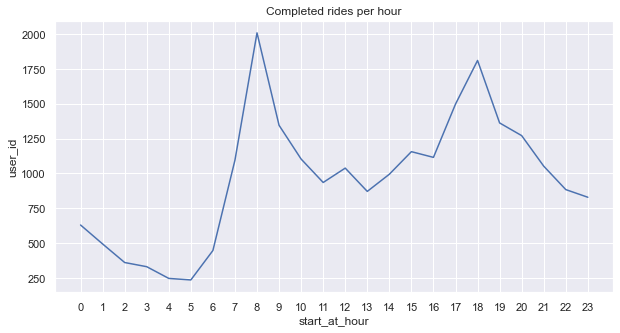

In [822]:
# Completed rides per hour
sns.set()
plt.figure(figsize=(10,5))
x = np.arange(0, 24, 1)
sns.lineplot(x='start_at_hour', y='user_id', data=df_hour_traffic)
plt.title('Completed rides per hour')
plt.xticks(x)
plt.show()

# En qué días el cliente no encontró Cabify

In [823]:
# Filter end_state with 'not found', 'no show' values
df_not_found = df.copy()
df_not_found = df_not_found[df_not_found['end_state'].isin(['failure', 'not found', 'no show', 'driver cancel'])]
print(df_not_found['end_state'].count())

columns = ['user_id', 'Day of Week - Start at']
notfound_per_day_of_week = df_not_found[columns].groupby(['Day of Week - Start at']).count().reindex(order_dayweek)
notfound_per_day_of_week

1706


,user_id
Day of Week - Start at,
Monday,269
Tuesday,374
Wednesday,256
Thursday,165
Friday,192
Saturday,227
Sunday,223


# En qué horas el cliente no encontró Cabify

In [824]:
notfound_hour_traffic = df_not_found[['user_id', 'start_at_hour']].groupby(['start_at_hour']).count()
notfound_hour_traffic

,user_id
start_at_hour,
0,106
1,78
2,62
3,59
4,34
5,38
6,39
7,41
8,101


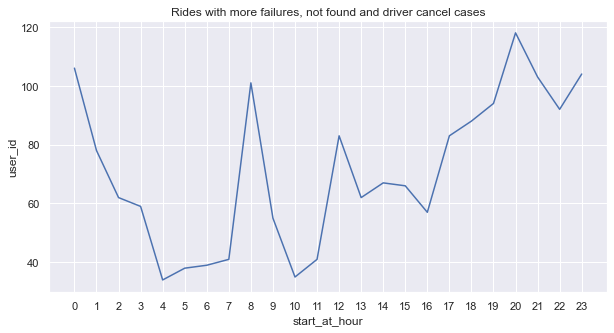

In [825]:
# Rides with more failures, not found and driver cancel cases
sns.set()
plt.figure(figsize=(10,5))
x = np.arange(0, 24, 1)
sns.lineplot(x='start_at_hour', y='user_id', data=notfound_hour_traffic)
plt.title('Rides with more failures, not found and driver cancel cases')
plt.xticks(x)
plt.show()

# Lugar en las que los clientes no encontraron coches (2010)
- Clusterizar la data geográfica

# Sómos suficientemente rápidos?

In [826]:
# Apply filters to determine ride times of completed rides
df_drop_off = df_drop_off[(df_drop_off['arrived_at'] > df_drop_off.index) &
                            (df_drop_off['end_at'] > df_drop_off['arrived_at']) &
                            (df_drop_off['arrived_at'].notnull()) & 
                            (df_drop_off['end_at'].notnull())]
df_drop_off

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_lat,start_lon,end_at,end_lat,...,cost,cost_distance,cost_duration,source,driver_score,rider_score,Day of Week - Start at,start_at_hour,Arrived-Start_duration_min,End-Arrived_duration_min
start_at,,,,,,,,,,,,,,,,,,,,,
2010-12-31 17:22:11,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,-12.085149,-76.977739,2010-12-31 17:49:24,-12.100105,...,0.0,0.0,0.0,Android,NaN,5.0,Friday,17,12.283333,27.216667
2010-12-31 16:36:49,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,-12.100601,-77.008026,2010-12-31 16:58:34,-12.084621,...,1805.0,1767.0,38.0,iPhone,5.0,4.0,Friday,16,4.566667,21.750000
2010-12-31 15:54:44,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,-12.126499,-77.003082,2010-12-31 16:23:32,-12.104248,...,1685.0,1685.0,0.0,iPhone,5.0,4.0,Friday,15,11.783333,28.800000
2010-12-31 15:49:39,29c460e9d44ae084d4631c5ade0713f4,a37ccff55ca3cff97b19b45ab2d89839,40187316352d2c03ddc19e9c8ad7c514,42aa958edf790ef3d45823386fb734ea,executive,asap,-12.124153,-76.994110,2010-12-31 16:13:14,-12.136452,...,1450.0,408.0,236.0,iPhone,5.0,5.0,Friday,15,10.983333,23.583333
2010-12-31 15:40:00,eb959517b2fb80c1618cea5160662091,d439fbb315b2966b8c84e219ec56ca88,62c2e39787aa19cd2513901cf3b4858d,62c2e39787aa19cd2513901cf3b49643,executive,reserved,-12.020939,-77.107483,2010-12-31 16:33:55,-12.077888,...,4958.0,4759.0,199.0,iPhone,NaN,5.0,Friday,15,0.733333,53.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01 04:39:10,1c6b5d467e8159465ccdbb612920727b,3d68e1172f35c1fbd06db5a1bc13b262,bb790ea51a0aff0f6d6e11020933c37c,8842ece0c6fb65eb4499f76c51d380b6,executive,asap,-12.131325,-77.018646,2010-01-01 05:18:42,-12.087906,...,3570.0,3492.0,78.0,iPhone,5.0,5.0,Friday,4,18.966667,39.533333
2010-01-01 04:20:34,1c6b5d467e8159465ccdbb612982b31b,9b474537c2b26020bb16aee19acacccf,924d4f0e7554566623e8ebb3902a8b5f,924d4f0e7554566623e8ebb3902a80f1,executive,asap,-12.120705,-76.988088,2010-01-01 05:45:38,-12.107141,...,6126.0,4933.0,1193.0,Android,5.0,5.0,Friday,4,15.133333,85.066667
2010-01-01 00:27:22,1c6b5d467e8159465ccdbb612983f728,9b474537c2b26020bb16aee19acacccf,a4dbb03efa4c2a99bbbb852350f65810,fc308d768d77788c726b74fd5e365e1b,executive,asap,-12.106378,-77.025686,2010-01-01 00:56:01,-12.100335,...,1900.0,1324.0,203.0,Android,NaN,5.0,Friday,0,13.633333,28.650000


In [827]:
# Describe Arrived-Start_duration_min
df_drop_off['Arrived-Start_duration_min'].describe()

count    12156.000000
mean        12.094248
std         14.643811
min          0.016667
25%          4.666667
50%          9.950000
75%         16.450000
max        626.666667
Name: Arrived-Start_duration_min, dtype: float64

In [828]:
# Exclude Arrived-Start_duration_min > 3 hours (180 min) to avoid outliers
df_drop_off[df_drop_off['Arrived-Start_duration_min'] < 180]['Arrived-Start_duration_min'].describe()

count    12151.000000
mean        11.896522
std         10.560044
min          0.016667
25%          4.658333
50%          9.933333
75%         16.433333
max        153.900000
Name: Arrived-Start_duration_min, dtype: float64

In [829]:
# Describe End-Arrived_duration_min
df_drop_off['End-Arrived_duration_min'].describe()

count    12156.000000
mean        43.937941
std         42.783821
min          0.083333
25%         25.883333
50%         36.533333
75%         51.483333
max       1417.083333
Name: End-Arrived_duration_min, dtype: float64

In [830]:
# Exclude End-Arrived_duration_min > 3 hours (180 min)
df_drop_off[df_drop_off['End-Arrived_duration_min'] < 180]['End-Arrived_duration_min'].describe()

count    12010.000000
mean        40.698719
std         24.948904
min          0.083333
25%         25.750000
50%         36.233333
75%         50.716667
max        179.850000
Name: End-Arrived_duration_min, dtype: float64

# En dónde nos faltan coches?

In [831]:
# Crear función para dibujar en el mapa
import plotly.express as px

def draw_cluster(df):    
    token = 'pk.eyJ1IjoiY3Jpc3RoaWFuY2FzdHJvIiwiYSI6ImNqeHA5NmU1MTA4MGkzYnM1YXVrejVzOXcifQ.HlvYODLUeII-RjguTftjnw'
    fig = px.scatter_mapbox(df, lat="start_lat", lon="start_lon", color="cluster",zoom=10)
    fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                       height=700,
                       mapbox = dict(
                center= dict(lat=-12.092334458438145, lon=-76.61835365985101), 
                accesstoken= token,
                zoom=7,            
                #height=600,
                style="light",
                #width=600
                ))
    fig.show()

In [832]:
# Districts where there are more cases of end_at with failuer, not found, no show and driver cancel values
df_not_found = df_not_found[df_not_found['end_state'].isin(['failure', 'not found', 'no show', 'driver cancel'])]
X = df_not_found[['start_lat','start_lon']].values

# Normalizing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)

# Clusterizar zonas donde al menos hay 20 solicitudes de servicio
clustering = DBSCAN(eps=0.10, min_samples=20).fit(Clus_dataSet)
#clustering = KMeans(n_clusters=5).fit(Clus_dataSet)
df_not_found['cluster']= clustering.labels_
df_not_found['cluster'] = df_not_found['cluster'].astype('str')
df_not_found.loc[df_not_found['cluster']=='-1','cluster']='100'

draw_cluster(df_not_found)

# En qué zonas hay más demanda?

In [833]:
# Districts where ther are more cases of end_at as drop_off (executed services)
X = df_drop_off[['start_lat','start_lon']].values

# Normalizing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)

# Clusterizar zonas donde al menos hay 20 solicitudes de servicio
clustering = DBSCAN(eps=0.05, min_samples=20).fit(Clus_dataSet)
#clustering = KMeans(n_clusters=5).fit(Clus_dataSet)
df_drop_off['cluster']= clustering.labels_
df_drop_off['cluster'] = df_drop_off['cluster'].astype('str')
df_drop_off.loc[df_drop_off['cluster']=='-1','cluster']='100'

draw_cluster(df_drop_off)

- Por la misma razón que San Isidro, Miraflores y Barranco hay alta demanda y también hay failure, no show y not found

# Qué conductores incentivarías? Cuál echarías?

- Nro. viajes satisfactorios por conductor diario y le saco la mediana
- Nro. viajes cancelados
- Mediana del price de cada conductor
- Mediana Duración del viaje como algo negativo
- La medianas de de su score


Poner una ponderación para cada una de estas variables
Botar percentil inferior 10% inferior, esos son los peores
Promover al percentil 75% superior, esos son los mejores

In [834]:
# Sólo viajes satisfactorios

df.groupby('driver_id').agg({'journey_id':'count', 'price':'median', 'duration': 'median', 'driver_score':'median', 'rider_score':'median'}).sort_values(by='journey_id', ascending=False)

,journey_id,price,duration,driver_score,rider_score
driver_id,,,,,
c814db2127582cf95dea1f74f43127c2,1523,2234.5,319.0,5.0,5.0
d665fb9f75ef5d9cd0fd89479380ba78,1225,2303.5,392.0,5.0,5.0
ff5c924e0b630fd7c019a4234059fdf4,1111,2017.0,301.0,5.0,5.0
406921adcca37705ef527b4246c0cfea,1075,2283.0,281.0,5.0,5.0
ec84a73745199ff840ecafcb924383ad,974,2113.0,225.5,5.0,5.0
...,...,...,...,...,...
b3ba9cda1b124b4fdc5d639f2416a9ca,1,1700.0,100.0,0.0,0.0
af07f9929390d66edf63ab7ee480273c,1,1700.0,19.0,NaN,NaN
ab90a1bf4289d96e78d4a47d7cc2cd22,1,1700.0,80.0,NaN,5.0
